In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

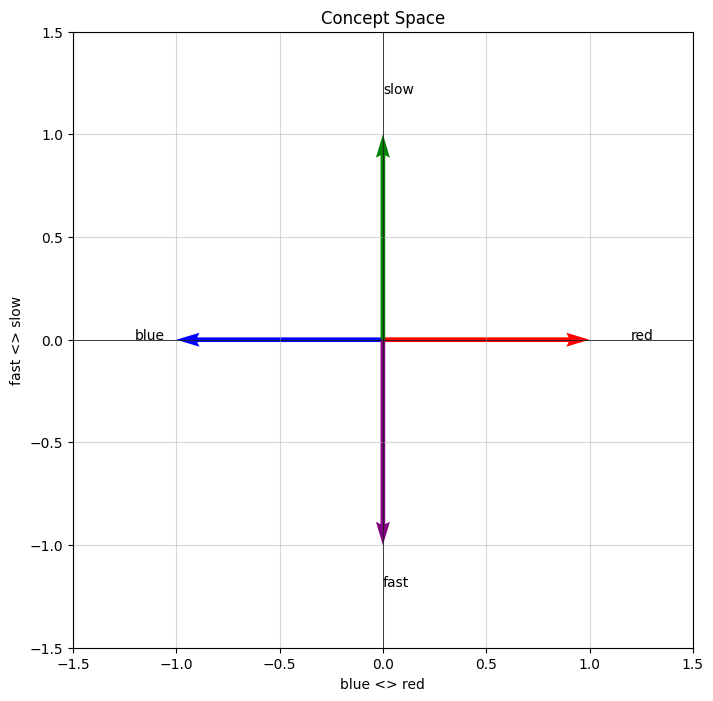

In [33]:
dimensionsNames = [
    "blue <> red",
    "fast <> slow",
]

concepts = {
    "red": np.array([1, 0]),
    "blue": np.array([-1, 0]),

    "slow": np.array([0, 1]),
    "fast": np.array([0, -1]),
}

colorPerConcept = {
    "red": "red",
    "blue": "blue",
    "slow": "green",
    "fast": "purple",
}

def plot_concept_space(concepts, dimensionsNames):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

    for concept_name, concept_vector in concepts.items():
        color = colorPerConcept.get(concept_name, 'black')
        ax.quiver(0, 0, concept_vector[0], concept_vector[1], angles='xy', scale_units='xy', scale=1, color=color)
        ax.text(concept_vector[0] * 1.2, concept_vector[1] * 1.2, concept_name)

    ax.set_xlabel(dimensionsNames[0])
    ax.set_ylabel(dimensionsNames[1])
    plt.grid(alpha=0.5)
    plt.title("Concept Space")
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()

plot_concept_space(concepts, dimensionsNames)

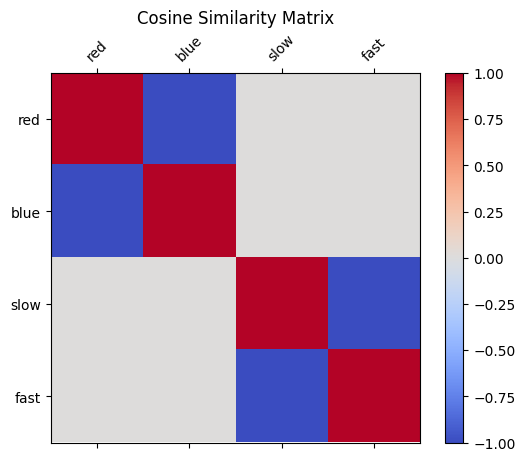

In [34]:
def compute_cosine_similarity_matrix(vectors):
    """Compute the cosine similarity matrix for a set of vectors."""
    norms = np.linalg.norm(vectors, axis=1)
    normalized_vectors = vectors / norms[:, np.newaxis]
    similarity_matrix = np.dot(normalized_vectors, normalized_vectors.T)
    return similarity_matrix

def plot_matrix(matrix, title):
    fig, ax = plt.subplots()
    cax = ax.matshow(matrix, cmap='coolwarm')
    plt.title(title)
    fig.colorbar(cax)
    plt.xticks(range(len(concepts)), list(concepts.keys()), rotation=45)
    plt.yticks(range(len(concepts)), list(concepts.keys()))
    plt.show()

distances_matrix = compute_cosine_similarity_matrix(np.array(list(concepts.values())))
plot_matrix(distances_matrix, "Cosine Similarity Matrix")

In [198]:
def create_object_cluster(mean, std, num_samples=10):
    """Create a cluster of objects in the concept space."""
    # Generate random samples from a multivariate normal distribution
    samples = np.random.multivariate_normal(mean, np.diag(std**2), num_samples)

    # Normalize the samples to have unit length
    norms = np.linalg.norm(samples, axis=1)
    samples = samples / norms[:, np.newaxis]

    return samples

np.random.seed(0)  # For reproducibility

# Define a cluster: Cars
# Composed of two three-clusters:
# 1. Modern sport cars (Small advantage to red, always fast)
# 2. Old sport cars (Large advantage to red, sometimes fast (lot of noise))
# 3. Other cars (Any color, any speed)
# The repartition is 8%, 4%, 88%
cluster1 = []

P = 1000
NB_MODERN_CARS = 80
NB_OLD_CARS = 40
NB_OTHER_CARS = P - NB_MODERN_CARS - NB_OLD_CARS

modern_cars = {
    "mean": np.array([0.30, -0.9]),
    "std": np.array([0.30, 0.10]),
}
old_cars = {
    "mean": np.array([0.7, -0.6]),
    "std": np.array([0.10, 0.35]),
}
other_cars = {
    "mean": np.array([0.0, 0.0]),
    "std": np.array([0.5, 0.5]),
}
idx_to_cluster = {}

cluster1.append(create_object_cluster(modern_cars["mean"], modern_cars["std"], num_samples=NB_MODERN_CARS))
for i in range(NB_MODERN_CARS):
    idx_to_cluster[i] = 0  # Modern sport cars

cluster1.append(create_object_cluster(old_cars["mean"], old_cars["std"], num_samples=NB_OLD_CARS))
for i in range(NB_MODERN_CARS, NB_MODERN_CARS + NB_OLD_CARS):
    idx_to_cluster[i] = 1  # Old sport cars

cluster1.append(create_object_cluster(other_cars["mean"], other_cars["std"], num_samples=P - NB_MODERN_CARS - NB_OLD_CARS))
for i in range(NB_MODERN_CARS + NB_OLD_CARS, P):
    idx_to_cluster[i] = 2  # Other cars

print(np.amin(list(idx_to_cluster.keys())), np.amax(list(idx_to_cluster.keys())))

cluster1 = np.vstack(cluster1)

overall_mean = np.mean(cluster1, axis=0)
overall_std = np.std(cluster1, axis=0)
print("Overall mean:", overall_mean)
print("Overall std:", overall_std)
# ==> A little red, ok-ish fast
car_embedding = overall_mean

0 999
Overall mean: [ 0.05061565 -0.11611395]
Overall std: [0.68599032 0.71650044]


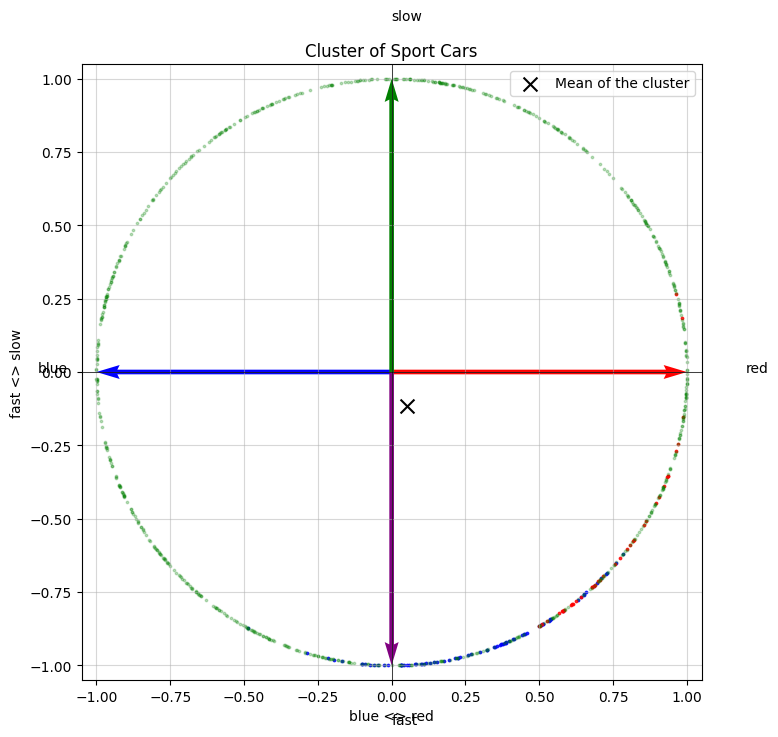

In [182]:
# Let's plot the cluster
def plot_cluster(cluster, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-1.05, 1.05)

    for concept_name, concept_vector in concepts.items():
        color = colorPerConcept.get(concept_name, 'black')
        ax.quiver(0, 0, concept_vector[0], concept_vector[1], angles='xy', scale_units='xy', scale=1, color=color)
        ax.text(concept_vector[0] * 1.2, concept_vector[1] * 1.2, concept_name)

    # Plot the mean of the cluster
    for index in idx_to_cluster:
        if idx_to_cluster[index] == 0:
            ax.scatter(cluster[index, 0], cluster[index, 1], alpha=0.8, color='blue', s=3)
        elif idx_to_cluster[index] == 1:
            ax.scatter(cluster[index, 0], cluster[index, 1], alpha=0.8, color='red', s=3)
        else:
            ax.scatter(cluster[index, 0], cluster[index, 1], alpha=0.25, color='green', s=3)

    # Add to the legend the mean of the cluster
    ax.scatter(overall_mean[0], overall_mean[1], color='black', marker='x', label='Mean of the cluster', s=100)

    ax.set_xlabel(dimensionsNames[0])
    ax.set_ylabel(dimensionsNames[1])
    plt.grid(alpha=0.5)
    plt.title(title)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.legend()
    plt.show()

plot_cluster(cluster1, "Cluster of Sport Cars")

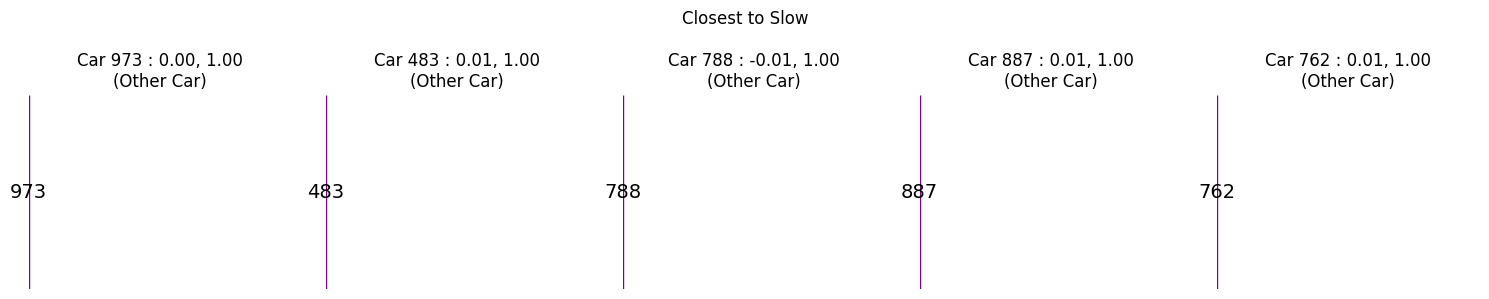

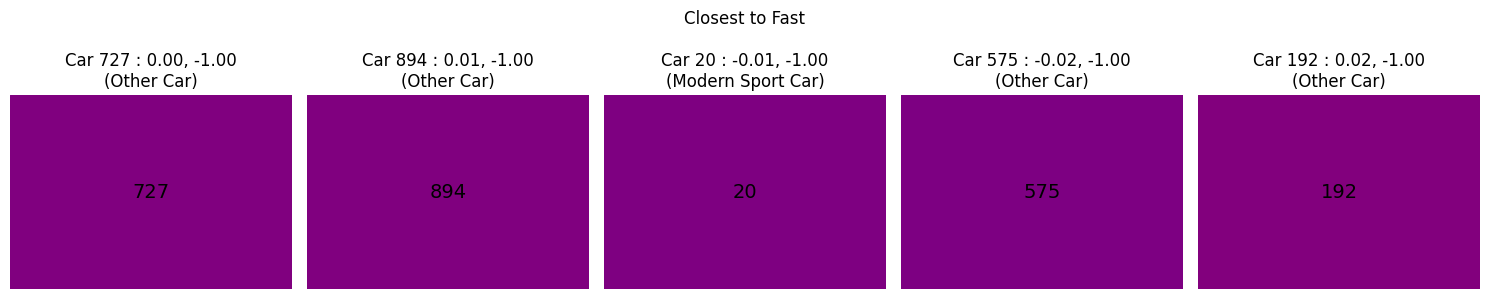

In [200]:
def plot_cars(ids, title, mark=[]):
    """
    len(ids) subplots, each subplot is a car, the red-blue dimension is represented using the color of the car,
    the fast-slow dimension is represented using the length of the car, the longer it is, the faster it is.
    """
    correspondingClass = [idx_to_cluster[i] for i in ids]

    nb_rows = max(len(ids)//5, 1)

    fig, axs = plt.subplots(nb_rows, 5, figsize=(15, 3*nb_rows))
    for row in range(nb_rows):
        for col in range(5):
            i = row * 5 + col
            if i >= len(ids):
                break

            if nb_rows==1:
                ax = axs[col]
            else:
                ax = axs[row, col]
            ax.axis('off')
                
            ax.set_xlim(0, 1.0)
            ax.set_ylim(0, 1.0)

            # Get the car embedding
            car_embedding = cluster1[ids[i]]

            # Get the color from rgb(255,0,0) to rgb(0,0,255)
            color_nm = (car_embedding[0] + 1) / 2 # 0 = blue, 1 = red
            color = (color_nm, 0, 1 - color_nm)
            color = [float(c) for c in color]

            # Determine the length based on the fast-slow dimension
            length = (1 + -car_embedding[1])/2

            # Draw the car as a rectangle
            ax.add_patch(plt.Rectangle((0, 0), length, 1.0, color=color))

            if ids[i] in mark:
                ax.text(length/2, 0.5, str(ids[i]), color='black', fontsize=16, ha='center', va='center', fontweight='bold')
            else:
                # Add a text with the car ID in the center
                ax.text(length/2, 0.5, str(ids[i]), color='black', fontsize=14, ha='center', va='center')

            # Set title and labels
            if correspondingClass[i] == 0:
                label = "Modern Sport Car"
            elif correspondingClass[i] == 1:
                label = "Old Sport Car"
            else:
                label = "Other Car"

            ax.set_title(f"Car {ids[i]} : {car_embedding[0]:.2f}, {car_embedding[1]:.2f}\n({label})")
            ax.set_xlabel(dimensionsNames[0])
            ax.set_ylabel(dimensionsNames[1])
            ax.grid(False)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def get_n_vectors_closest_to_vector(vectors, vector, n):
    # Get the indices of the n closest vectors to a given vector using cosine similarity
    similarities = np.dot(vectors, vector) / (np.linalg.norm(vectors, axis=1) * np.linalg.norm(vector))

    closest_indices = np.argsort(similarities)[-n:][::-1]  # Get the indices of the n largest similarities
    return closest_indices

slow_vector = concepts["slow"]
closest_to_slow = get_n_vectors_closest_to_vector(cluster1, slow_vector, 5)
plot_cars(closest_to_slow, "Closest to Slow")

fast_vector = concepts["fast"]
closest_to_fast = get_n_vectors_closest_to_vector(cluster1, fast_vector, 5)
plot_cars(closest_to_fast, "Closest to Fast")

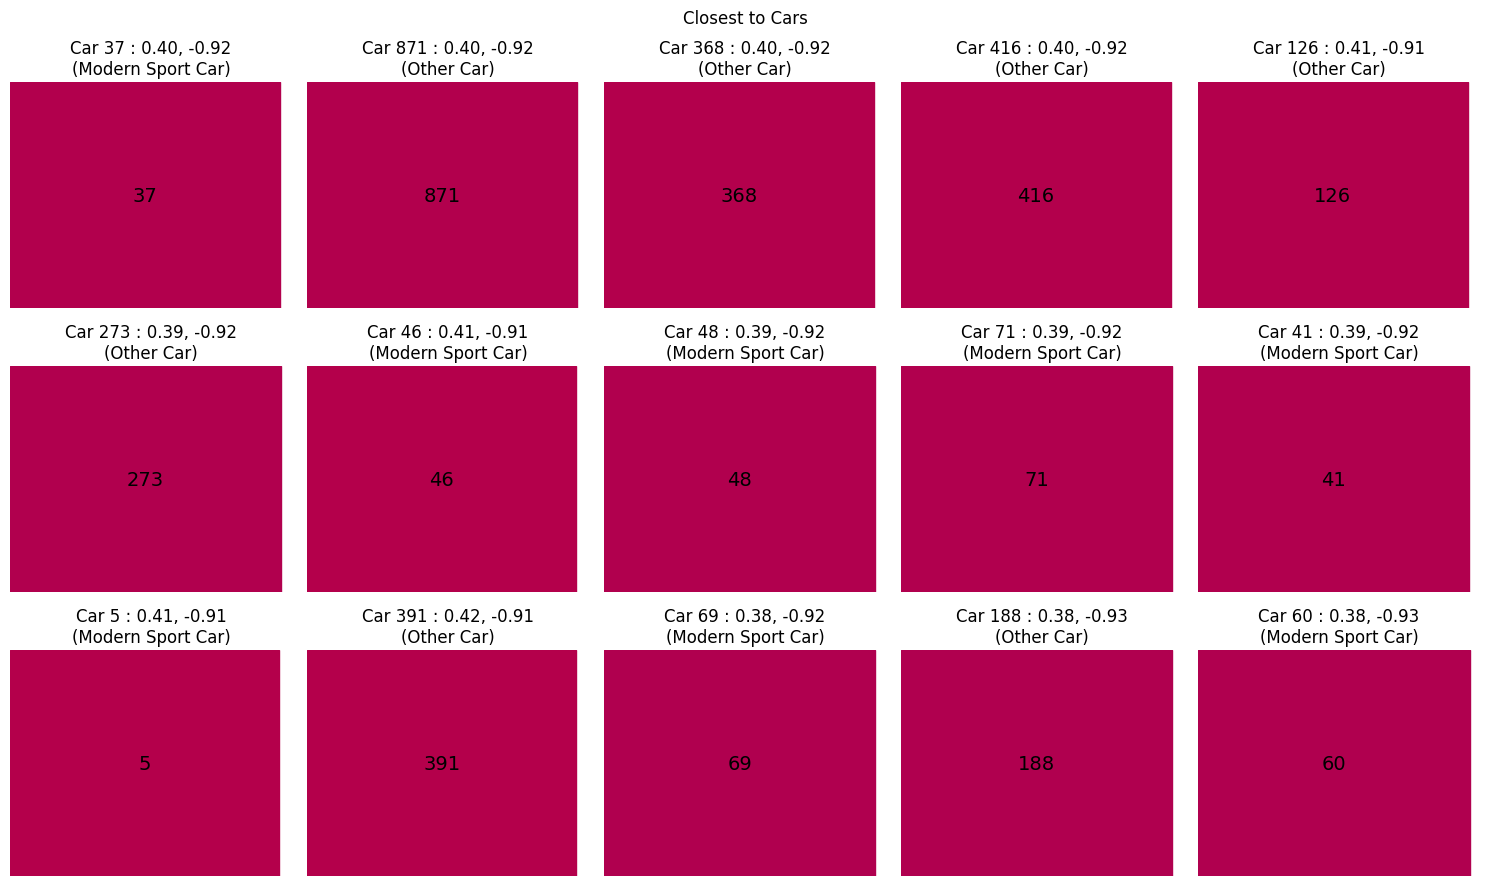

In [201]:
# Let's just search for cars
closest_to_cars = get_n_vectors_closest_to_vector(cluster1, car_embedding, 15)
plot_cars(closest_to_cars, "Closest to Cars")

# There are no old cars !
We can see that most cars are defined as modern cars due to the imbalance in the initial training data.
Let's imagine that we can get an embedding for "slow car". Naively, we could define this embedding as the mean between the embedding of "car" and the embedding of "slow".

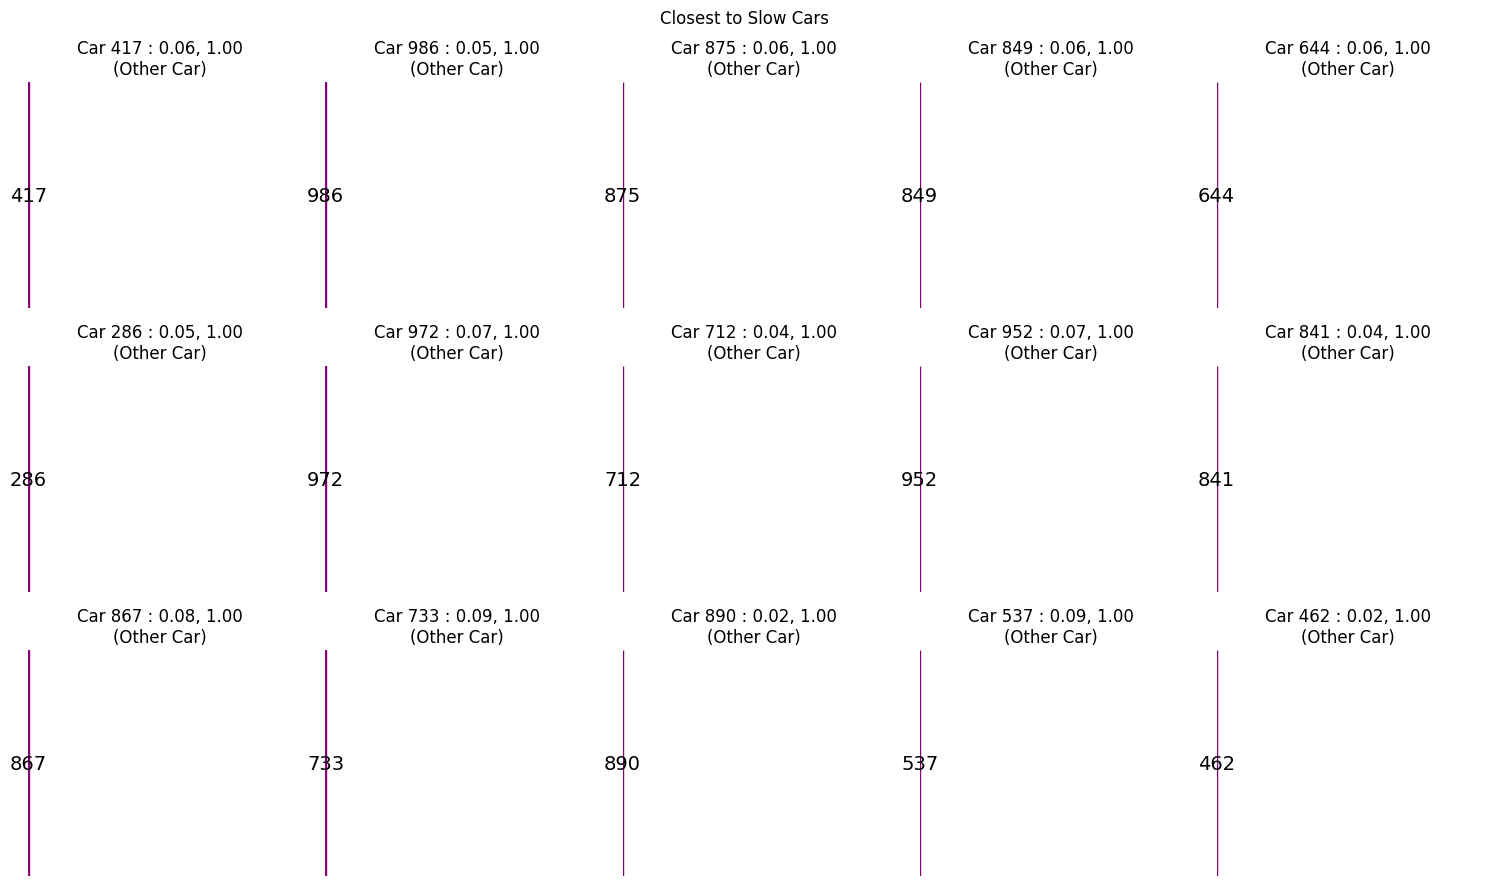

In [202]:
slow_car_embedding = car_embedding/2 + concepts["slow"]/2
# Normalize
slow_car_embedding /= np.linalg.norm(slow_car_embedding)
slow_car_embedding = slow_car_embedding / np.linalg.norm(slow_car_embedding)

closest_to_slow_cars = get_n_vectors_closest_to_vector(cluster1, slow_car_embedding, 15)
plot_cars(closest_to_slow_cars, "Closest to Slow Cars")

Let's pick an edge case, we want to find the sport car that is the bluest

Bluest sport car id: 10


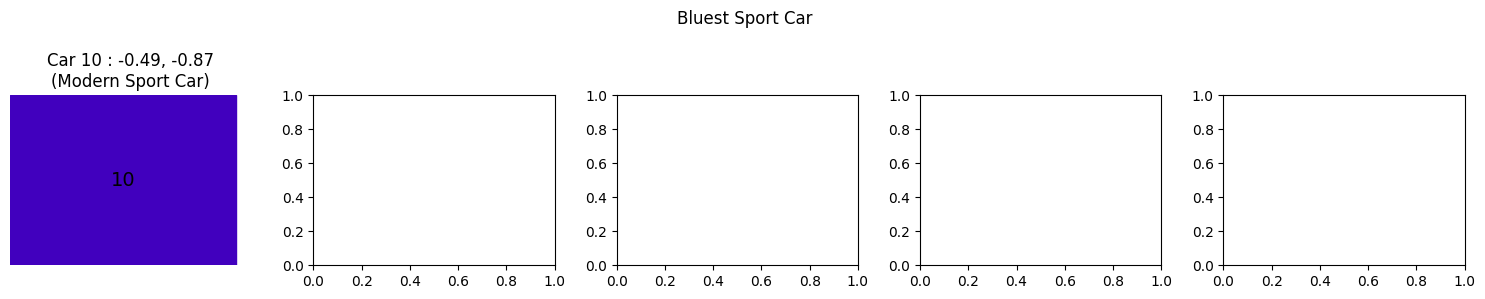

In [203]:
bluest_sport_car_id = 0
bluest_value = 1.1
for i in range(len(cluster1)):
    if idx_to_cluster[i] == 0:
        if cluster1[i][0] < bluest_value:
            bluest_value = cluster1[i][0]
            bluest_sport_car_id = i

print("Bluest sport car id:", bluest_sport_car_id)
plot_cars([bluest_sport_car_id], "Bluest Sport Car")

How could one make a search with finding this car in mind ? He could mix the concept of blue and fast ?

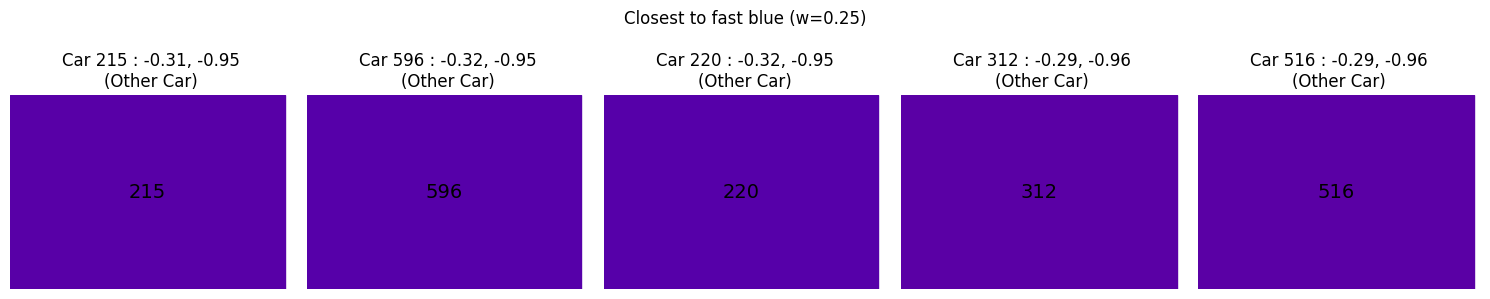

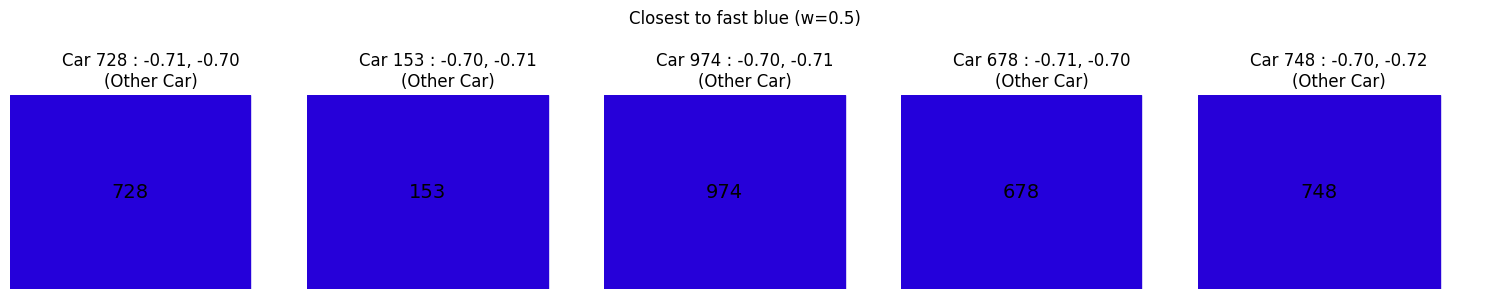

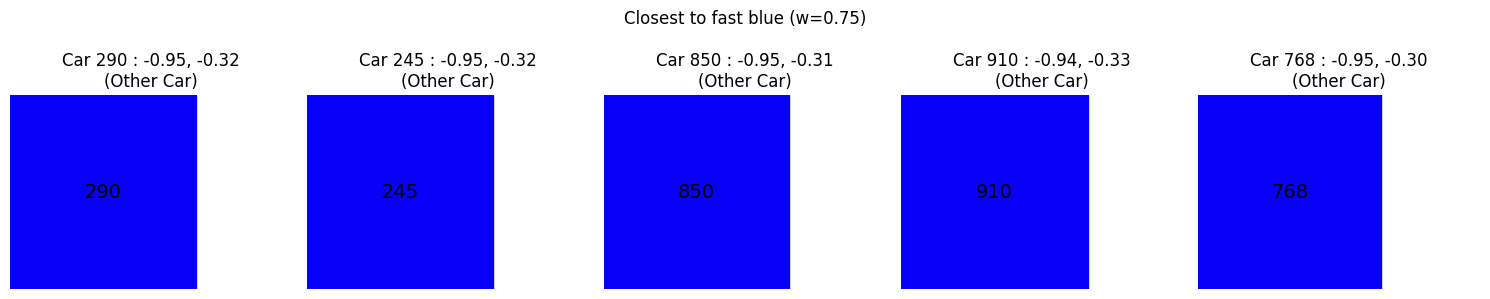

In [242]:
for w in [0.25, 0.5, 0.75]:
    bluest_car_embedding = concepts["fast"] * (1 - w) + concepts["blue"] * w
    # Normalize
    bluest_car_embedding /= np.linalg.norm(bluest_car_embedding)
    bluest_car_embedding = bluest_car_embedding / np.linalg.norm(bluest_car_embedding)

    closest_to_bluest_cars = get_n_vectors_closest_to_vector(cluster1, bluest_car_embedding, 5)
    plot_cars(closest_to_bluest_cars, f"Closest to fast blue (w={w})", mark=[10])

Mmhhh, it seems like it it not present (in the top 5) even when playing with the weights. Let's find the weights that best rank the car we are looking for

w values: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
w=0.2, rank=100
w=0.30000000000000004, rank=38
w=0.4, rank=26
Best w=0.4, rank=26


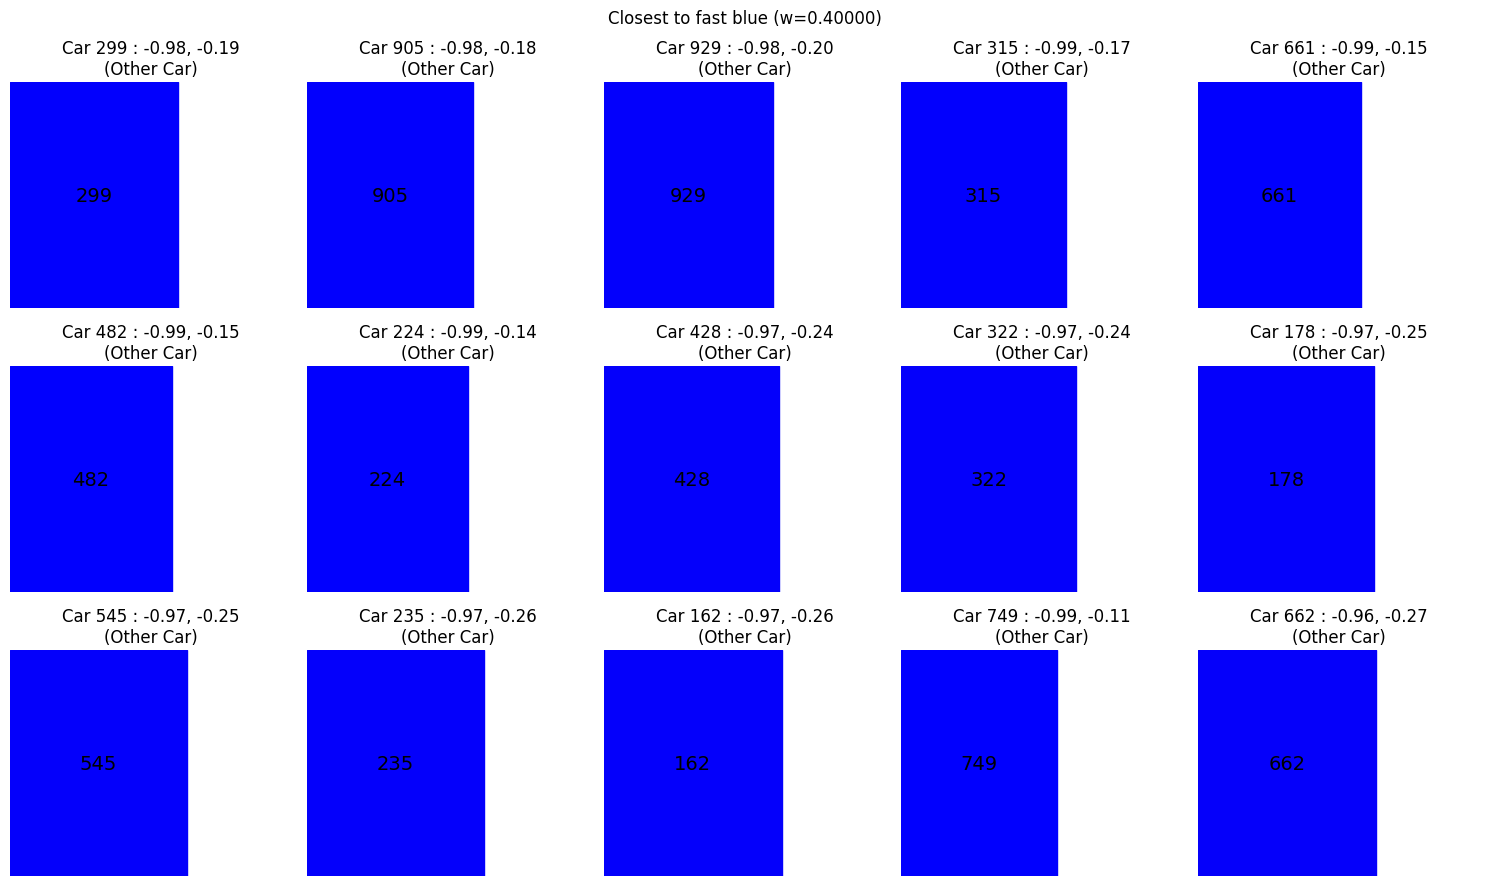

In [243]:
ws = np.linspace(0, 1, 11)
print("w values:", ws)
best_rank = float('inf')
best_w = None
max_s_space = 100
for w in ws:
    bluest_car_embedding = concepts["fast"] * (1 - w) + concepts["blue"] * w
    # Normalize
    bluest_car_embedding /= np.linalg.norm(bluest_car_embedding)
    bluest_car_embedding = bluest_car_embedding / np.linalg.norm(bluest_car_embedding)

    closest_to_bluest_cars = get_n_vectors_closest_to_vector(cluster1, bluest_car_embedding, max_s_space)
    if 10 in closest_to_bluest_cars:
        rank = np.where(closest_to_bluest_cars == 10)[0][0] + 1
        if rank < best_rank:
            best_rank = rank
            best_w = w
            print(f"w={w}, rank={rank}")

print(f"Best w={best_w}, rank={best_rank}")

# Search with best_w
bluest_car_embedding = car_embedding * (1 - best_w) + concepts["blue"] * best_w
# Normalize
bluest_car_embedding /= np.linalg.norm(bluest_car_embedding)
bluest_car_embedding = bluest_car_embedding / np.linalg.norm(bluest_car_embedding)

closest_to_bluest_cars = get_n_vectors_closest_to_vector(cluster1, bluest_car_embedding, 15)
plot_cars(closest_to_bluest_cars, f"Closest to fast blue (w={best_w:.5f})", mark=[10])

The best weight we found got us a rank of 26. 

*We could get better results with more weights, but in practise the user should not have to tune his search for an hour to get something !*

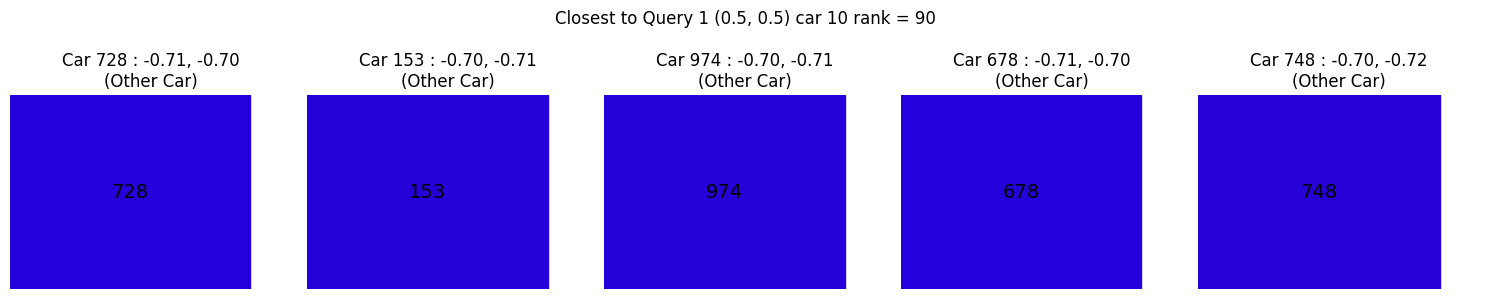

Closest car to car 10: 748


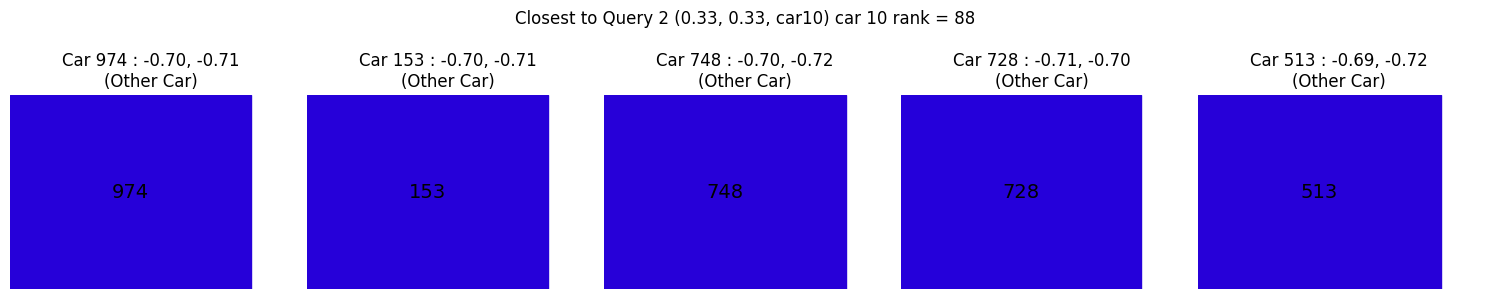

In [244]:
# Could we use a good enough search, take the closest result and add it to the query ?
# 1) Initial query (0.5 and 0.5)
query1_embedding = concepts["fast"] * 0.5 + concepts["blue"] * 0.5
# Normalize
query1_embedding /= np.linalg.norm(query1_embedding)
query1_embedding = query1_embedding / np.linalg.norm(query1_embedding)

closest_to_query1 = get_n_vectors_closest_to_vector(cluster1, query1_embedding, P)
rank_of_car10 = np.where(closest_to_query1 == 10)[0][0] + 1
closest_to_query1 = closest_to_query1[:5]
plot_cars(closest_to_query1, f"Closest to Query 1 (0.5, 0.5) car 10 rank = {rank_of_car10}", mark=[10])

embeddings_closest_to_query1 = [cluster1[i] for i in closest_to_query1]
embeddings_closest_to_query1 = np.array(embeddings_closest_to_query1)
closest_car_to_car10_index = get_n_vectors_closest_to_vector(embeddings_closest_to_query1, cluster1[10], 1)
real_index_from_car10_index = closest_to_query1[closest_car_to_car10_index[0]]
print("Closest car to car 10:", real_index_from_car10_index)

# Add it to the search
query2_embedding = concepts["fast"] * (1/3) + concepts["blue"] * (1/3) + cluster1[real_index_from_car10_index] * (1/3)
# Normalize
query2_embedding /= np.linalg.norm(query2_embedding)
query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1
closest_to_query2 = closest_to_query2[:5]
plot_cars(closest_to_query2, f"Closest to Query 2 (0.33, 0.33, car10) car 10 rank = {rank_of_car10}", mark=[10])

Could we "like" the first sports car in the results ?

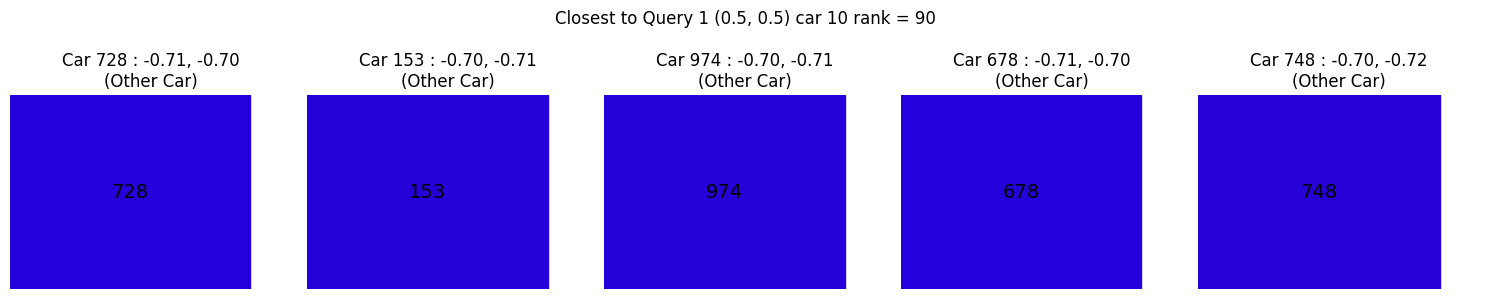

Closest car to car 10: 10


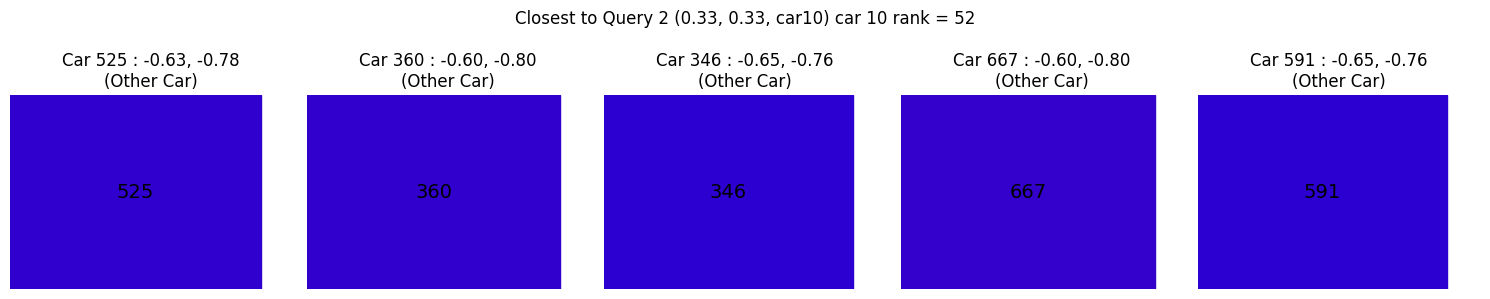

In [259]:
# Let's do the same but with rocchio
# 1) Initial query (0.5 and 0.5)
query1_embedding = concepts["fast"] * 0.5 + concepts["blue"] * 0.5
# Normalize
query1_embedding /= np.linalg.norm(query1_embedding)
query1_embedding = query1_embedding / np.linalg.norm(query1_embedding)

closest_to_query1 = get_n_vectors_closest_to_vector(cluster1, query1_embedding, P)
rank_of_car10 = np.where(closest_to_query1 == 10)[0][0] + 1

# Get the first sport car
for id in closest_to_query1:
    if idx_to_cluster[id] == 0:
        real_index_from_car10_index = id
        break

closest_to_query1 = closest_to_query1[:5]
plot_cars(closest_to_query1, f"Closest to Query 1 (0.5, 0.5) car 10 rank = {rank_of_car10}", mark=[10])

print("Closest car to car 10:", real_index_from_car10_index)

# Add it to the search
rocchio_k = 5
rocchio_scale = 1.0
query2_embedding = concepts["fast"] * (1/3) + concepts["blue"] * (1/3) + (1/3) * cluster1[real_index_from_car10_index]
# Normalize
query2_embedding /= np.linalg.norm(query2_embedding)
query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1
closest_to_query2 = closest_to_query2[:5]
plot_cars(closest_to_query2, f"Closest to Query 2 (0.33, 0.33, car10) car 10 rank = {rank_of_car10}", mark=[10])

Liking the first sport car gives our search a good indication !

It improves the results but not that much. Could we use rocchio ? 

In [248]:
def rocchio(car_id, weight, rocchio_k, rocchio_scale):
    embeddings = []
    weights = []

    car_id_embedding = cluster1[car_id]

    # Get k nearest cars to car_id
    nearest_cars = get_n_vectors_closest_to_vector(cluster1, car_id_embedding, rocchio_k)

    for nearest_car in nearest_cars:
        nearest_car_embedding = cluster1[nearest_car]
        
        cosine_similarity = np.dot(car_id_embedding, nearest_car_embedding) / (np.linalg.norm(car_id_embedding) * np.linalg.norm(nearest_car_embedding))

        weights.append(rocchio_scale * weight * np.power(cosine_similarity, 2))
        embeddings.append(nearest_car_embedding)

    return embeddings, weights

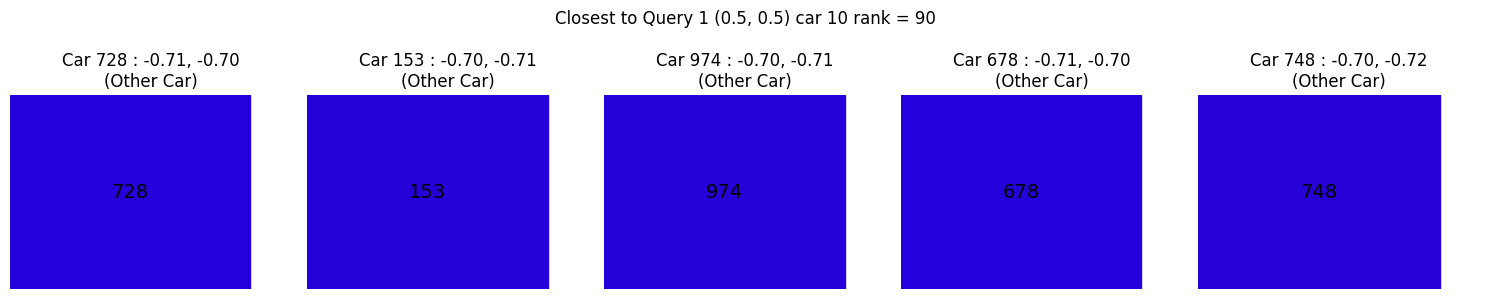

Closest car to car 10: 748


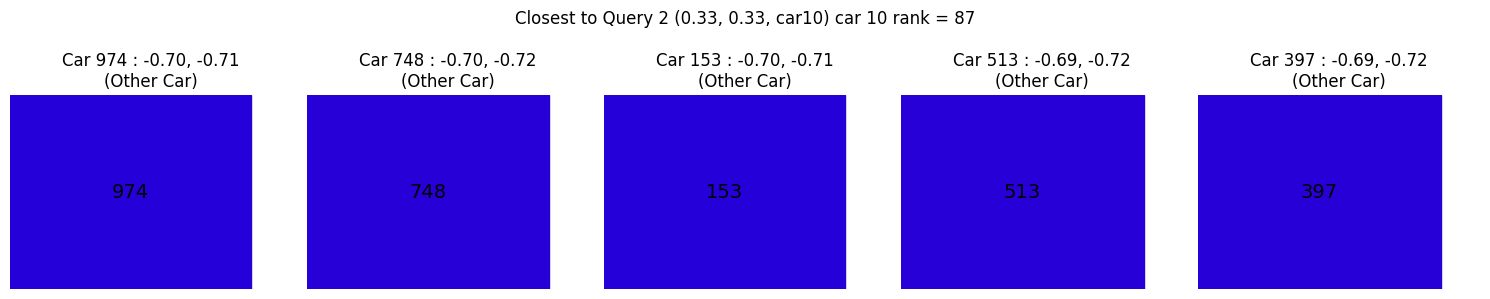

In [257]:
# Let's do the same but with rocchio
# 1) Initial query (0.5 and 0.5)
query1_embedding = concepts["fast"] * 0.5 + concepts["blue"] * 0.5
# Normalize
query1_embedding /= np.linalg.norm(query1_embedding)
query1_embedding = query1_embedding / np.linalg.norm(query1_embedding)

closest_to_query1 = get_n_vectors_closest_to_vector(cluster1, query1_embedding, P)
rank_of_car10 = np.where(closest_to_query1 == 10)[0][0] + 1
closest_to_query1 = closest_to_query1[:5]
plot_cars(closest_to_query1, f"Closest to Query 1 (0.5, 0.5) car 10 rank = {rank_of_car10}", mark=[10])

embeddings_closest_to_query1 = [cluster1[i] for i in closest_to_query1]
embeddings_closest_to_query1 = np.array(embeddings_closest_to_query1)
closest_car_to_car10_index = get_n_vectors_closest_to_vector(embeddings_closest_to_query1, cluster1[10], 1)
real_index_from_car10_index = closest_to_query1[closest_car_to_car10_index[0]]
print("Closest car to car 10:", real_index_from_car10_index)

# Add it to the search
rocchio_k = 5
rocchio_scale = 1.0
query2_embedding = concepts["fast"] * (1/3) + concepts["blue"] * (1/3)
# Let's add the rocchio embeddings
rocchio_embeddings, rocchio_weights = rocchio(real_index_from_car10_index, 1/3, rocchio_k, rocchio_scale)
for i in range(len(rocchio_embeddings)):
    query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]
# Normalize
query2_embedding /= np.linalg.norm(query2_embedding)
query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1
closest_to_query2 = closest_to_query2[:5]
plot_cars(closest_to_query2, f"Closest to Query 2 (0.33, 0.33, car10) car 10 rank = {rank_of_car10}", mark=[10])

It improved ! But it is not perfect, the search is returning only (other cars). Let's try to find the first sport car in the results (query 1) and use it for rocchio

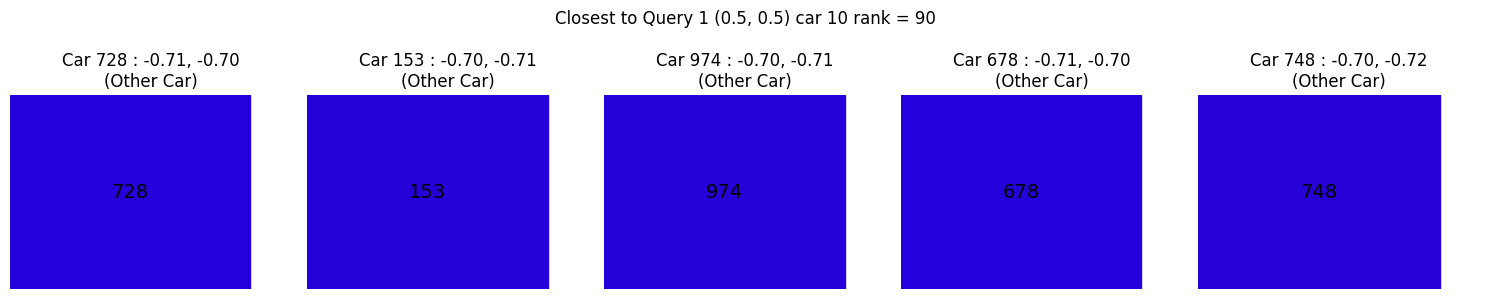

Closest car to car 10: 10


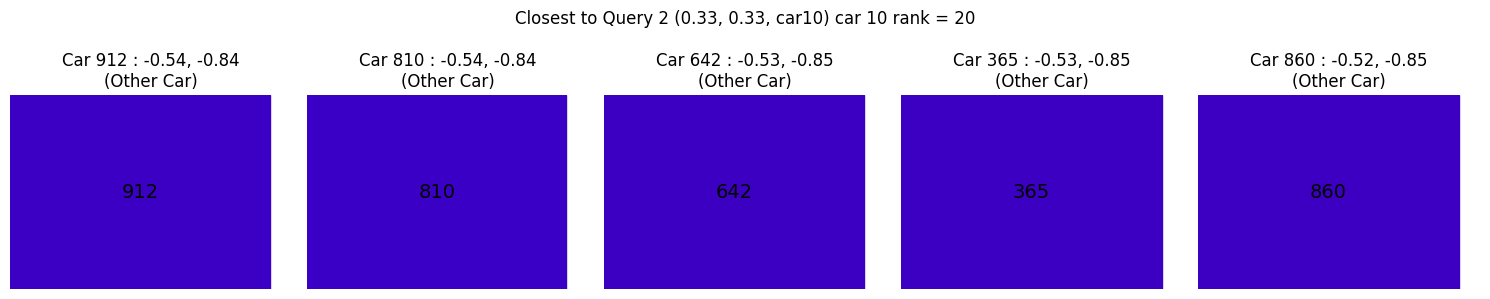

In [258]:
# Let's do the same but with rocchio
# 1) Initial query (0.5 and 0.5)
query1_embedding = concepts["fast"] * 0.5 + concepts["blue"] * 0.5
# Normalize
query1_embedding /= np.linalg.norm(query1_embedding)
query1_embedding = query1_embedding / np.linalg.norm(query1_embedding)

closest_to_query1 = get_n_vectors_closest_to_vector(cluster1, query1_embedding, P)
rank_of_car10 = np.where(closest_to_query1 == 10)[0][0] + 1

# Get the first sport car
for id in closest_to_query1:
    if idx_to_cluster[id] == 0:
        real_index_from_car10_index = id
        break

closest_to_query1 = closest_to_query1[:5]
plot_cars(closest_to_query1, f"Closest to Query 1 (0.5, 0.5) car 10 rank = {rank_of_car10}", mark=[10])

print("Closest car to car 10:", real_index_from_car10_index)

# Add it to the search
rocchio_k = 5
rocchio_scale = 1.0
query2_embedding = concepts["fast"] * (1/3) + concepts["blue"] * (1/3)
# Let's add the rocchio embeddings
rocchio_embeddings, rocchio_weights = rocchio(real_index_from_car10_index, 1/3, rocchio_k, rocchio_scale)
for i in range(len(rocchio_embeddings)):
    query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]
# Normalize
query2_embedding /= np.linalg.norm(query2_embedding)
query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1
closest_to_query2 = closest_to_query2[:5]
plot_cars(closest_to_query2, f"Closest to Query 2 (0.33, 0.33, car10) car 10 rank = {rank_of_car10}", mark=[10])

This is way better ! 

Rocchio k=1, scale=0.1, rank=83
Rocchio k=1, scale=0.5, rank=69
Rocchio k=1, scale=1.0, rank=52
Rocchio k=3, scale=0.1, rank=76
Rocchio k=3, scale=0.5, rank=44
Rocchio k=3, scale=1.0, rank=27
Rocchio k=5, scale=0.1, rank=69
Rocchio k=5, scale=0.5, rank=29
Rocchio k=5, scale=1.0, rank=20
Rocchio k=10, scale=0.1, rank=52
Rocchio k=10, scale=0.5, rank=20
Rocchio k=10, scale=1.0, rank=12
Best hyperparameters: k=10, scale=1.0, rank=12


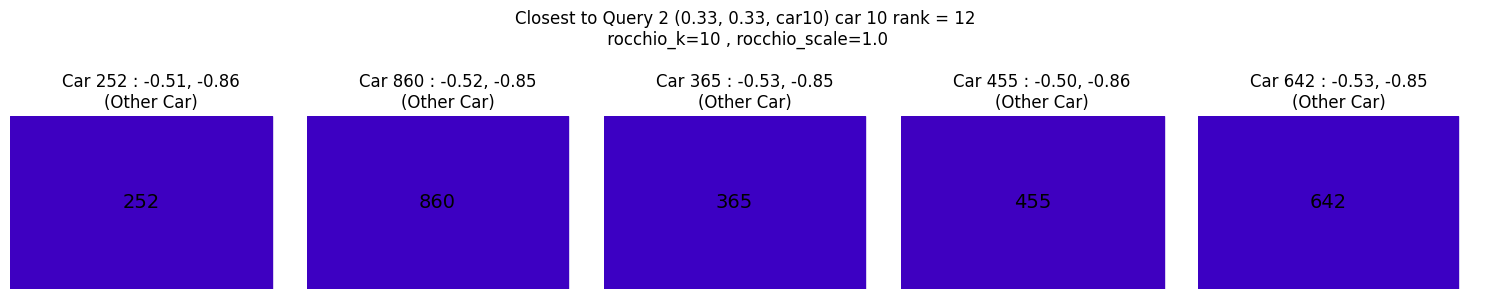

In [262]:
# Let's play with the rocchio parameters
rocchio_k = [1, 3, 5, 10] # 1 = classic like
rocchio_scale = [0.1, 0.5, 1.0] # 1 = classic like

best_hyperparameters = None
best_rank = float('inf')

for k in rocchio_k:
    for scale in rocchio_scale:
        # Add it to the search
        query2_embedding = concepts["fast"] * (1/3) + concepts["blue"] * (1/3)
        # Let's add the rocchio embeddings
        rocchio_embeddings, rocchio_weights = rocchio(real_index_from_car10_index, 1/3, k, scale)
        for i in range(len(rocchio_embeddings)):
            query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]
        # Normalize
        query2_embedding /= np.linalg.norm(query2_embedding)
        query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

        closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
        rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1

        if rank_of_car10 < best_rank:
            best_rank = rank_of_car10
            best_hyperparameters = (k, scale)

        print(f"Rocchio k={k}, scale={scale}, rank={rank_of_car10}")
print(f"Best hyperparameters: k={best_hyperparameters[0]}, scale={best_hyperparameters[1]}, rank={best_rank}")

# Let's search with the best hyperparameters
rocchio_k = best_hyperparameters[0]
rocchio_scale = best_hyperparameters[1]
# Add it to the search
query2_embedding = concepts["fast"] * (1/3) + concepts["blue"] * (1/3)
rocchio_embeddings, rocchio_weights = rocchio(real_index_from_car10_index, 1/3, rocchio_k, rocchio_scale)
for i in range(len(rocchio_embeddings)):
    query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]

# Normalize
query2_embedding /= np.linalg.norm(query2_embedding)
query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1

closest_to_query2 = closest_to_query2[:5]
plot_cars(closest_to_query2, f"Closest to Query 2 (0.33, 0.33, car10) car 10 rank = {rank_of_car10}\n rocchio_k={rocchio_k} , rocchio_scale={rocchio_scale}", mark=[10])

In this specific cluster, rocchio works best when looking at the 10 images around the one we like/dislike.

Speaking about dislikes, could we use that instead of liking ? We see only other cars, this is NOT something that we want to see

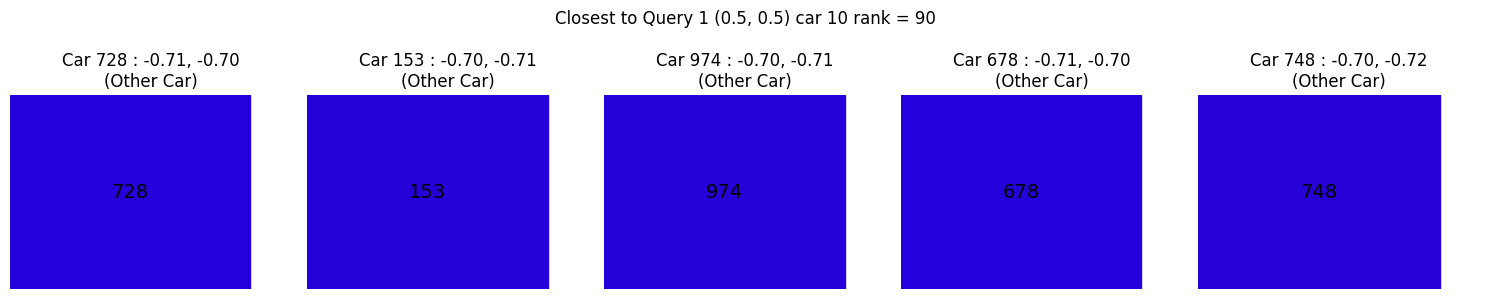

First other car id: 728


In [264]:
# 1) Initial query (0.5 and 0.5)
query1_embedding = concepts["fast"] * 0.5 + concepts["blue"] * 0.5
# Normalize
query1_embedding /= np.linalg.norm(query1_embedding)
query1_embedding = query1_embedding / np.linalg.norm(query1_embedding)

closest_to_query1 = get_n_vectors_closest_to_vector(cluster1, query1_embedding, P)
rank_of_car10 = np.where(closest_to_query1 == 10)[0][0] + 1

# Get the first other car
for id in closest_to_query1:
    if idx_to_cluster[id] == 2:
        other_car_id = id
        break

closest_to_query1 = closest_to_query1[:5]
plot_cars(closest_to_query1, f"Closest to Query 1 (0.5, 0.5) car 10 rank = {rank_of_car10}", mark=[10])

print("First other car id:", other_car_id)


Rocchio k=1, scale=0.1, rank=90
Rocchio k=1, scale=0.5, rank=90
Rocchio k=1, scale=1.0, rank=88
Rocchio k=3, scale=0.1, rank=90
Rocchio k=3, scale=0.5, rank=893
Rocchio k=3, scale=1.0, rank=909
Rocchio k=5, scale=0.1, rank=90
Rocchio k=5, scale=0.5, rank=908
Rocchio k=5, scale=1.0, rank=910
Rocchio k=10, scale=0.1, rank=89
Rocchio k=10, scale=0.5, rank=910
Rocchio k=10, scale=1.0, rank=910
Best hyperparameters: k=1, scale=1.0, rank=88


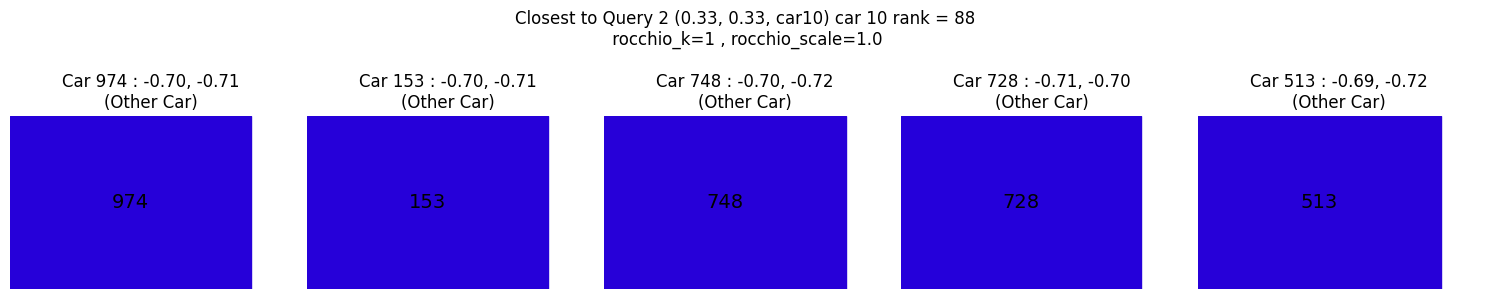

In [268]:
# Let's play with the rocchio parameters
rocchio_k = [1, 3, 5, 10] # 1 = classic like
rocchio_scale = [0.1, 0.5, 1.0] # 1 = classic like

best_hyperparameters = None
best_rank = float('inf')

for k in rocchio_k:
    for scale in rocchio_scale:
        # Add it to the search
        query2_embedding = concepts["fast"] * (1/3) + concepts["blue"] * (1/3)
        # Let's add the rocchio embeddings
        rocchio_embeddings, rocchio_weights = rocchio(other_car_id, (-1/3), k, scale)
        for i in range(len(rocchio_embeddings)):
            query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]
        # Normalize
        query2_embedding /= np.linalg.norm(query2_embedding)
        query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

        closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
        rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1
        closest_to_query2 = closest_to_query2[:5]

        if rank_of_car10 < best_rank:
            best_rank = rank_of_car10
            best_hyperparameters = (k, scale)

        print(f"Rocchio k={k}, scale={scale}, rank={rank_of_car10}")
print(f"Best hyperparameters: k={best_hyperparameters[0]}, scale={best_hyperparameters[1]}, rank={best_rank}")

# Let's search with the best hyperparameters
rocchio_k = best_hyperparameters[0]
rocchio_scale = best_hyperparameters[1]
# Add it to the search
query2_embedding = concepts["fast"] * (1/3) + concepts["blue"] * (1/3)
rocchio_embeddings, rocchio_weights = rocchio(other_car_id, -1/3, rocchio_k, rocchio_scale)
for i in range(len(rocchio_embeddings)):
    query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]

# Normalize
query2_embedding /= np.linalg.norm(query2_embedding)
query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1

closest_to_query2 = closest_to_query2[:5]
plot_cars(closest_to_query2, f"Closest to Query 2 (0.33, 0.33, car10) car 10 rank = {rank_of_car10}\n rocchio_k={rocchio_k} , rocchio_scale={rocchio_scale}", mark=[10])

Disliking a car is not helping at all ! What about mixing a like and a dislike ?

Rocchio k=1, scale=0.1, rank=83
Rocchio k=1, scale=0.5, rank=56
Rocchio k=1, scale=1.0, rank=26
Rocchio k=3, scale=0.1, rank=74
Rocchio k=3, scale=0.5, rank=13
Rocchio k=3, scale=1.0, rank=116
Rocchio k=5, scale=0.1, rank=55
Rocchio k=5, scale=0.5, rank=81
Rocchio k=5, scale=1.0, rank=247
Rocchio k=10, scale=0.1, rank=26
Rocchio k=10, scale=0.5, rank=244
Rocchio k=10, scale=1.0, rank=380
Best hyperparameters: k=3, scale=0.5, rank=13


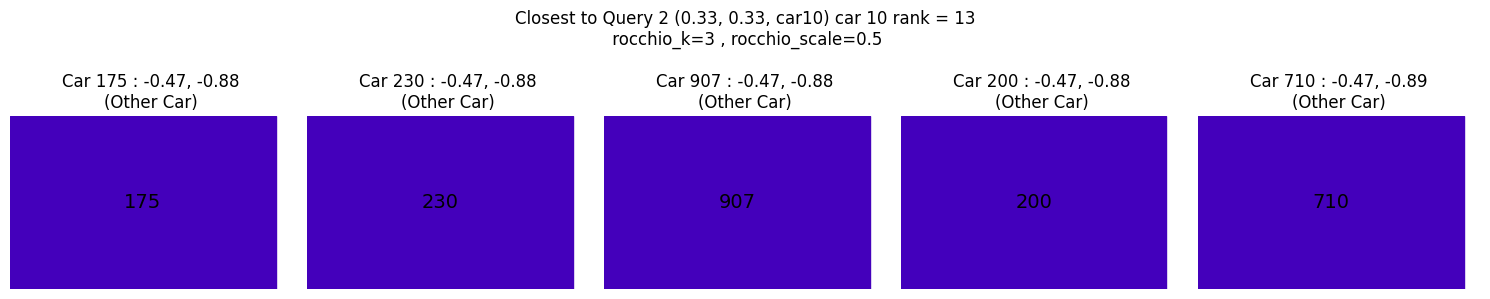

In [269]:
# Let's play with the rocchio parameters
rocchio_k = [1, 3, 5, 10] # 1 = classic like
rocchio_scale = [0.1, 0.5, 1.0] # 1 = classic like

best_hyperparameters = None
best_rank = float('inf')

for k in rocchio_k:
    for scale in rocchio_scale:
        # Add it to the search
        query2_embedding = concepts["fast"] * (1/4) + concepts["blue"] * (1/4)

        # Dislike other car
        rocchio_embeddings, rocchio_weights = rocchio(other_car_id, (-1/4), k, scale)
        for i in range(len(rocchio_embeddings)):
            query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]

        # Like sport car
        rocchio_embeddings, rocchio_weights = rocchio(real_index_from_car10_index, (1/4), k, scale)
        for i in range(len(rocchio_embeddings)):
            query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]

        # Normalize
        query2_embedding /= np.linalg.norm(query2_embedding)
        query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

        closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
        rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1
        closest_to_query2 = closest_to_query2[:5]

        if rank_of_car10 < best_rank:
            best_rank = rank_of_car10
            best_hyperparameters = (k, scale)

        print(f"Rocchio k={k}, scale={scale}, rank={rank_of_car10}")
print(f"Best hyperparameters: k={best_hyperparameters[0]}, scale={best_hyperparameters[1]}, rank={best_rank}")

# Let's search with the best hyperparameters
rocchio_k = best_hyperparameters[0]
rocchio_scale = best_hyperparameters[1]
# Add it to the search
query2_embedding = concepts["fast"] * (1/4) + concepts["blue"] * (1/4)

# Dislike other car
rocchio_embeddings, rocchio_weights = rocchio(other_car_id, -1/4, rocchio_k, rocchio_scale)
for i in range(len(rocchio_embeddings)):
    query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]

# Like sport car
rocchio_embeddings, rocchio_weights = rocchio(real_index_from_car10_index, 1/4, rocchio_k, rocchio_scale)
for i in range(len(rocchio_embeddings)):
    query2_embedding += rocchio_weights[i] * rocchio_embeddings[i]

    

# Normalize
query2_embedding /= np.linalg.norm(query2_embedding)
query2_embedding = query2_embedding / np.linalg.norm(query2_embedding)

closest_to_query2 = get_n_vectors_closest_to_vector(cluster1, query2_embedding, P)
rank_of_car10 = np.where(closest_to_query2 == 10)[0][0] + 1

closest_to_query2 = closest_to_query2[:5]
plot_cars(closest_to_query2, f"Closest to Query 2 (0.33, 0.33, car10) car 10 rank = {rank_of_car10}\n rocchio_k={rocchio_k} , rocchio_scale={rocchio_scale}", mark=[10])